<a href="https://www.kaggle.com/code/alirizaercan/store-sales-time-series-data-science-technique?scriptVersionId=231932874" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Welcome to Store Sales - Time Series - Data Science Technique Notebook!**


In this notebook, the focus will be Store Sales - Time Series - Data Science Technique. The every part will explain with data scientist mindset. Let's go!

# Dataset Story: Favorita Store Sales Prediction

## Overview
In this competition, the goal is to predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes information about dates, stores, products, promotions, and sales numbers. Supplementary files provide additional context that may be useful for building predictive models.

## File Descriptions and Data Field Information

### train.csv
The training dataset consists of a time series of features and target sales. Key columns include:
- **store_nbr**: Identifies the store where the products are sold.
- **family**: Identifies the type of product sold.
- **sales**: The total sales for a product family at a particular store on a given date. Sales values can be fractional since products can be sold in fractional units (e.g., 1.5 kg of cheese).
- **onpromotion**: The total number of items in a product family that were being promoted at a store on a given date.

### test.csv
The test dataset has the same features as the training data. You will predict the target sales for the dates in this file, which are for the 15 days following the last date in the training data.

### sample_submission.csv
A sample submission file in the correct format for submitting your predictions.

### stores.csv
Contains metadata about the stores, including:
- **city**
- **state**
- **type**
- **cluster**: A grouping of similar stores.

### oil.csv
Daily oil prices, which include values during both the train and test data timeframes. Ecuador's economy is highly dependent on oil prices, making this data crucial for understanding economic impacts on sales.

### holidays_events.csv
Information about holidays and events, with metadata. Key points to note:
- **transferred**: Indicates whether a holiday was officially moved to another date by the government. The original date is like a normal day, while the transferred date is the actual celebration.
- **type**: Includes types like Transfer, Bridge, Work Day, etc. For example, a Bridge day extends a holiday, while a Work Day is an extra working day to compensate for a Bridge.

### Additional Notes
- Wages in the public sector are paid every two weeks on the 15th and the last day of the month, potentially affecting supermarket sales patterns.
- A significant event, a magnitude 7.8 earthquake, struck Ecuador on April 16, 2016, leading to increased sales of relief items for several weeks following the disaster.

## Conclusion
This dataset provides a rich set of features and contextual information that can be used to predict sales at Favorita stores. Understanding the interplay between store metadata, promotions, holidays, oil prices, and significant events will be key to building accurate predictive models.


<font color = 'darkblue'>
Content:

1. [Problem Definition and Project Planning](#1)
2. [Import Libraries](#2)   
3. [Load and Check Data](#3)
4. [Understand Dataset](#4)
5. [Variable Description](#5)
6. [Exploratory Data Analysis](#6)   
    * [Univariate Variable Analysis(EDA)](#7)
7. [Basic Data Analysis](#8)
8. [Data Cleaning](#9)
    * [Outlier Detection](#10)
    * [Missing Values](#11)
9. [Feature Engineering](#12)
10. [Modeling](#13)
11. [Prediction and Submission](#14)

<a id = "1"></a><br>

## Problem Definition and Project Planning

### Problem Definition:

Our objective is to construct a predictive model to forecast sales for thousands of product families sold at Favorita stores in Ecuador. The training data encompasses dates, store and product information, promotional status, and sales numbers. Supplementary data includes store metadata, oil prices, holidays and events, which may influence sales patterns.

The challenge lies in analyzing these datasets to predict future sales, thereby enabling better inventory management and sales strategies for Favorita stores. Accurate predictions can help optimize stock levels, reduce waste, and improve customer satisfaction by ensuring product availability.

### Project Planning:

* ***Understanding the Objective:***

We clearly defined the problem in the problem definition. Our focus will be to develop the most accurate **submission.csv** file for the competition.

* ***Data Explanation:***

    ***Data Split:***

    ***The dataset is divided into several files:***

    - **train.csv**: Contains historical sales data for building machine learning models. This includes the target sales numbers.
    - **test.csv**: Used to evaluate model performance on unseen data. Sales numbers are to be predicted for the dates in this file.
    - **sample_submission.csv**: A sample file to demonstrate the correct submission format.
    - **stores.csv**: Store metadata including city, state, type, and cluster.
    - **oil.csv**: Daily oil prices, providing economic context affecting sales.
    - **holidays_events.csv**: Information about holidays and events that might influence sales.

    ***Target Variable:***

    *sales:* The total sales for a product family at a particular store on a given date.

    ***Key Features:***

    *store_nbr:* Identifies the store where products are sold.
    
    *family:* Identifies the type of product sold.
    
    *onpromotion:* Indicates the total number of items in a product family that were being promoted at a store on a given date.
    
    *date:* The specific date of the sales record.

    Additional contextual features from supplementary files include:
    
    *city, state, type, cluster:* Store metadata from stores.csv.
    
    *dcoilwtico:* Daily oil prices from oil.csv.
    
    *holiday_type, transferred:* Holiday and event details from holidays_events.csv.

* ***Import Libraries:***
    *We will import the necessary libraries for data manipulation, analysis, and modeling.*
    
* ***Load and Check Data:***
    *We will load the datasets and perform initial checks to understand their structure and contents.*
    
* ***Understand Dataset:***
    *We will gain insights into the dataset by examining its characteristics and statistical properties.*

* ***Variable Description:***
    *We will review the variables to understand their types (categorical or numerical) and relevance to the problem.*

* ***Exploratory Data Analysis (EDA):***
    *We will conduct exploratory data analysis to uncover patterns and relationships within the data. Visualization will be a key tool in this step.*

* ***Basic Data Analysis:***
    *We will perform basic data analysis to delve deeper into the dataset and extract meaningful insights.*

* ***Data Cleaning:***
    *We will clean the data by addressing duplicates, missing values, outliers, and ensuring data consistency. This is a crucial step for any data science project.*

* ***Feature Engineering:***
    *We will create new features and transform existing ones to improve the predictive power of our model. This step allows for creativity and domain-specific knowledge application.*

* ***Modeling:***
    *We will select and train machine learning models that best fit our data. The goal is to find a model that provides accurate sales predictions.*

* ***Prediction and Submission:***
    *We will generate predictions for the test dataset and create the submission file according to the competition requirements.*

***Now, we can start our coding journey following the planned steps. Understanding each step thoroughly will enhance your skills as a data scientist. Let's begin!***

<a id = "2"></a><br>
# Import Libraries
We will need some libraries in this project, we need to import necessary libraries. We didn't choose our model so we will talk about model later. We can add our machine learning model libraries later. We can add 'matplotlib', 'seaborn', 'matplotlib.pyplot', 'Counter', 'warning' libraries right now. I can explain their roles in data science like that: 

**NumPy:**
Provides efficient numerical computation capabilities for arrays and matrices.

**Pandas:**
Offers high-performance, easy-to-use data structures and data analysis tools for labeled data.

**Matplotlib:**
Creates various static, animated, and interactive visualizations for data exploration and communication.

**Seaborn:**
Builds upon Matplotlib to create high-level statistical graphics with a focus on aesthetics and ease of use.

**from collections import Counter:**
Creates a dictionary-like object (Counter) that counts the occurrences of elements in an iterable (like a list or string).

**warnings:**
Controls how Python handles warning messages.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/tmp/ipykernel_18/3803698544.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


<a id = "3"></a><br>
# Load and Check Data

We will load and check data in this step.

In [2]:
train = pd.read_csv("../input/store-sales-time-series-forecasting/train.csv")
test = pd.read_csv("../input/store-sales-time-series-forecasting/test.csv")
stores = pd.read_csv("../input/store-sales-time-series-forecasting/stores.csv")
oil = pd.read_csv('../input/store-sales-time-series-forecasting/oil.csv')
holiday = pd.read_csv('../input/store-sales-time-series-forecasting/holidays_events.csv')
transactions = pd.read_csv("../input/store-sales-time-series-forecasting/transactions.csv").sort_values(["store_nbr", "date"])

In [3]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [5]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [6]:
holiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [7]:
transactions

,date,store_nbr,transactions
1,2013-01-02,1,2111
47,2013-01-03,1,1833
93,2013-01-04,1,1863
139,2013-01-05,1,1509
185,2013-01-06,1,520
...,...,...,...
83271,2017-08-11,54,768
83325,2017-08-12,54,903
83379,2017-08-13,54,1054
83433,2017-08-14,54,818


## Merge All Data

We need to merge all data in a dataframe. Let's do it!

Firstly we need to convert the 'date' columns to datetime to merge all data!

In [8]:
train["date"] = pd.to_datetime(train.date)
test["date"] = pd.to_datetime(test.date)
transactions["date"] = pd.to_datetime(transactions.date)
holiday["date"] = pd.to_datetime(holiday.date)
oil["date"] = pd.to_datetime(oil.date)

We will make some transformations to ensure consistent data types.

In [9]:
train['onpromotion'] = train['onpromotion'].astype("float16")
test['onpromotion'] = test['onpromotion'].astype("float16")  # Ensuring consistent data type
train['sales'] = train['sales'].astype("float32")
stores['cluster'] = stores['cluster'].astype("int8")

We will merge datasets in ***'train1'*** dataframe!

In [10]:
train1 = train.merge(holiday, on='date', how='left')
train1 = train1.merge(oil, on='date', how='left')
train1 = train1.merge(stores, on='store_nbr', how='left')
train1 = train1.merge(transactions, on=['date', 'store_nbr'], how='left')
train1 = train1.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})

We will extract additional date features!

In [11]:
train1['date'] = pd.to_datetime(train1['date'])
train1['year'] = train1['date'].dt.year
train1['month'] = train1['date'].dt.month
train1['week'] = train1['date'].dt.isocalendar().week
train1['quarter'] = train1['date'].dt.quarter
train1['day_of_week'] = train1['date'].dt.day_name()

We will look our merged dataset! 

In [12]:
train1

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0.0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000000,0.0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.000000,0.0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.000000,0.0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.000000,0.0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.132996,0.0,Holiday,Local,Riobamba,Fundacion de Riobamba,...,Quito,Pichincha,B,6,2155.0,2017,8,33,3,Tuesday
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.552994,1.0,Holiday,Local,Riobamba,Fundacion de Riobamba,...,Quito,Pichincha,B,6,2155.0,2017,8,33,3,Tuesday
3054345,3000885,2017-08-15,9,PRODUCE,2419.729004,148.0,Holiday,Local,Riobamba,Fundacion de Riobamba,...,Quito,Pichincha,B,6,2155.0,2017,8,33,3,Tuesday
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000,8.0,Holiday,Local,Riobamba,Fundacion de Riobamba,...,Quito,Pichincha,B,6,2155.0,2017,8,33,3,Tuesday


<a id = "4"></a><br>
# Understand Dataset
We will understand dataset with some codes and we will check the dataset.

We will see the columns of train dataset:

In [13]:
train1.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'holiday_type', 'locale', 'locale_name', 'description', 'transferred',
       'dcoilwtico', 'city', 'state', 'store_type', 'cluster', 'transactions',
       'year', 'month', 'week', 'quarter', 'day_of_week'],
      dtype='object')

We will see the first 10 index and last 10 index in the below codes:

We want to see all the columns in DataFrame. The below will set for us:

In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [15]:
train1.head(10)

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0.0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0.0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0.0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0.0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
6,6,2013-01-01,1,CELEBRATION,0.0,0.0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
7,7,2013-01-01,1,CLEANING,0.0,0.0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
8,8,2013-01-01,1,DAIRY,0.0,0.0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
9,9,2013-01-01,1,DELI,0.0,0.0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday


In [16]:
train1.tail(10)

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
3054338,3000878,2017-08-15,9,MAGAZINES,11.000000,0.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0,2017,8,33,3,Tuesday
3054339,3000879,2017-08-15,9,MEATS,449.227997,0.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0,2017,8,33,3,Tuesday
3054340,3000880,2017-08-15,9,PERSONAL CARE,522.000000,11.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0,2017,8,33,3,Tuesday
3054341,3000881,2017-08-15,9,PET SUPPLIES,6.000000,0.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0,2017,8,33,3,Tuesday
3054342,3000882,2017-08-15,9,PLAYERS AND ELECTRONICS,6.000000,0.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0,2017,8,33,3,Tuesday
3054343,3000883,2017-08-15,9,POULTRY,438.132996,0.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0,2017,8,33,3,Tuesday
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.552994,1.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0,2017,8,33,3,Tuesday
3054345,3000885,2017-08-15,9,PRODUCE,2419.729004,148.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0,2017,8,33,3,Tuesday
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000,8.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0,2017,8,33,3,Tuesday
3054347,3000887,2017-08-15,9,SEAFOOD,16.000000,0.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0,2017,8,33,3,Tuesday


We will see statistical details about data in the below code:

In [17]:
train1.describe()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,transactions,year,month,week,quarter
count,3.054348e+06,3054348,3.054348e+06,3.054348e+06,3054348.0,2.099196e+06,3.054348e+06,2.805231e+06,3.054348e+06,3.054348e+06,3054348.0,3.054348e+06
mean,1.504277e+06,2015-04-26 12:11:45.717619200,2.750000e+01,3.590209e+02,NaN,6.801587e+01,8.481481e+00,1.697071e+03,2.014842e+03,6.222870e+00,25.308635,2.413652e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.0,2.619000e+01,1.000000e+00,5.000000e+00,2.013000e+03,1.000000e+00,1.0,1.000000e+00
25%,7.546768e+05,2014-03-01 00:00:00,1.400000e+01,0.000000e+00,0.0,4.641000e+01,4.000000e+00,1.046000e+03,2.014000e+03,3.000000e+00,13.0,1.000000e+00
50%,1.507572e+06,2015-04-28 12:00:00,2.750000e+01,1.100000e+01,0.0,5.343000e+01,8.500000e+00,1.395000e+03,2.015000e+03,6.000000e+00,25.0,2.000000e+00
75%,2.255120e+06,2016-06-22 00:00:00,4.100000e+01,1.960110e+02,0.0,9.581000e+01,1.300000e+01,2.081000e+03,2.016000e+03,9.000000e+00,38.0,3.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,741.0,1.106200e+02,1.700000e+01,8.359000e+03,2.017000e+03,1.200000e+01,53.0,4.000000e+00
std,8.662610e+05,NaN,1.558579e+01,1.107286e+03,NaN,2.569134e+01,4.649735e+00,9.668317e+02,1.345607e+00,3.374251e+00,14.750509,1.095690e+00


<a id = "5"></a><br>
# Variable Description
Understanding the dataset variables is crucial for accurate analysis. Below are the descriptions of each variable:

* **id**: Unique transaction identifier.
* **date**: Date of the transaction (YYYY-MM-DD format).
* **store_nbr**: Unique identifier for the store where the transaction occurred.
* **family**: Product category (e.g., "BEVERAGES", "DAIRY").
* **sales**: Total sales amount (float, may be zero for holidays).
* **onpromotion**: Number of items in the transaction that were on promotion.
* **holiday_type**: Type of holiday (e.g., "National", "Local").
* **locale**: Scope of the holiday ("National" or "Local").
* **locale_name**: Name of the region/city for local holidays.
* **description**: Description of the holiday/event.
* **transferred**: Boolean indicating if the holiday was officially moved.
* **dcoilwtico**: Daily oil price (relevant for economic context).
* **city**: City where the store is located.
* **state**: State/province of the store.
* **store_type**: Store classification (e.g., "A", "B", "D").
* **cluster**: Grouping of similar stores.
* **transactions**: Total number of transactions in the store that day.
* **year**: Year of the transaction.
* **month**: Month of the transaction (1-12).
* **week**: Week number of the year (1-53).
* **quarter**: Quarter of the year (1-4).
* **day_of_week**: Name of the weekday (e.g., "Tuesday").


We will see the detailed info about dataset variables. For example we can see data types with .info() method:

In [18]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float32       
 5   onpromotion   float16       
 6   holiday_type  object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   object        
 11  dcoilwtico    float64       
 12  city          object        
 13  state         object        
 14  store_type    object        
 15  cluster       int8          
 16  transactions  float64       
 17  year          int32         
 18  month         int32         
 19  week          UInt32        
 20  quarter       int32         
 21  day_of_week   object        
dtypes: UInt32(1), datetime64[ns](1), float16(1), float32(1), float64(2

### Data Type Summary
- **Numeric**:  
  - `int64(2)`: `id`, `store_nbr`  
  - `int32(3)`: `year`, `month`, `quarter`  
  - `int8(1)`: `cluster`  
  - `UInt32(1)`: `week`  
  - `float32(1)`: `sales`  
  - `float16(1)`: `onpromotion`  
  - `float64(2)`: `dcoilwtico`, `transactions`  

- **Categorical/Text**:  
  - `object(10)`: `family`, `holiday_type`, `locale`, `locale_name`, `description`, `transferred`, `city`, `state`, `store_type`, `day_of_week`  

- **DateTime**:  
  - `datetime64[ns](1)`: `date`  

### Notes:
- **Missing Values**:  
  - `dcoilwtico` has ~955,152 nulls (only 2,099,196 entries).  
  - `transactions` has ~249,117 nulls (2,805,231 entries).  
- **Zeros in `sales`**: Likely due to holidays (e.g., `2013-01-01` had `sales=0` for all categories).  

<a id = "6"></a><br>
# Exploratory Data Analysis (EDA) 
We can understand data deeper in Exploratory Data Analysis (EDA). In this step, we will do exploratory data analysis. We will focus to univariate variable analysis. We will do some visualization according to our data. We will seperate data to categorical and numerical variables. Firstly we should look our categorical and numerical variables:


**Categorical Variables:** family, holiday_type, locale, locale_name, description, transferred, city, state, store_type, day_of_week

**Numerical Variables:** 

- **Discrete:** id, store_nbr, cluster, year, month, week, quarter

- **Continuous:** sales, onpromotion, dcoilwtico, transactions

**DateTime Variable::** date

`sales` is our target variable!

<a id = "7"></a><br>
## Univariate Variable Analysis

Firstly we should define univariate variable analysis:
Univariate analysis is a fundamental statistical technique used to explore and understand the distribution of a single variable within a dataset. It focuses on summarizing the data, identifying patterns, and describing the characteristics of that single variable.

We separated the variables at the top. We can start with categorical variables in the below code:

### Categorical Variable

We will visualize categorical variables. Firstly, we will drop some columns. They are not necessary for visualiziation. Let's write code!


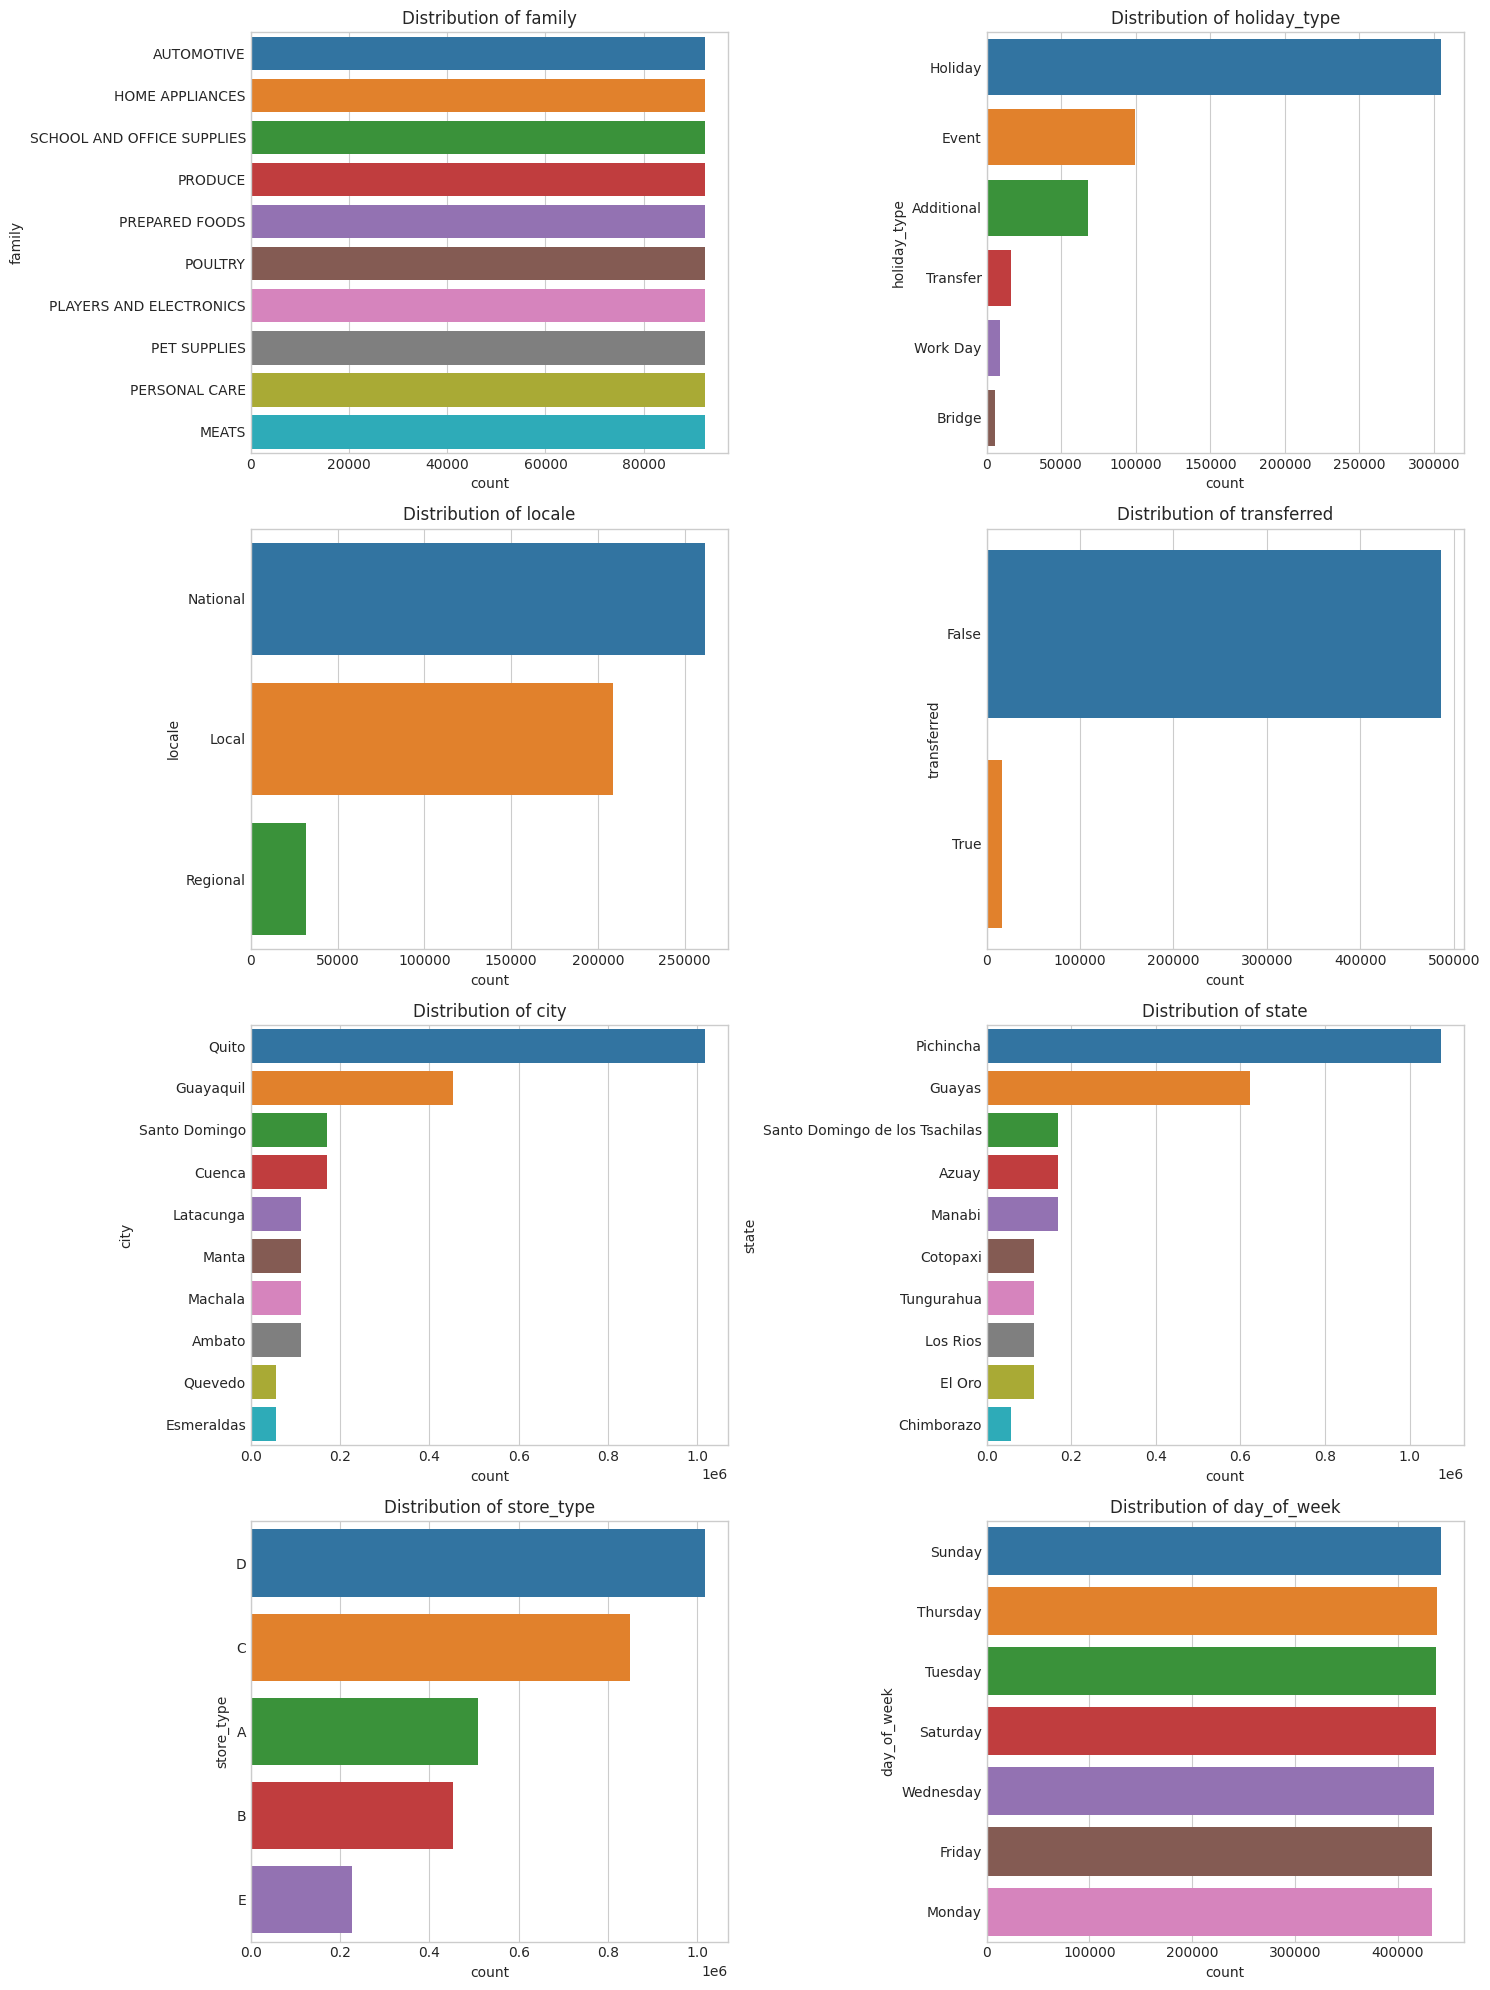

In [19]:
drop_cols = ['description', 'locale_name']  # Example: Too many unique values
cat_vars = train1.select_dtypes(include='object').columns.drop(drop_cols, errors='ignore')

# Plot categorical variables
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_vars, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=train1, y=col, order=train1[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

### Numerical Variable

We will visualize numerical variable in this step. 

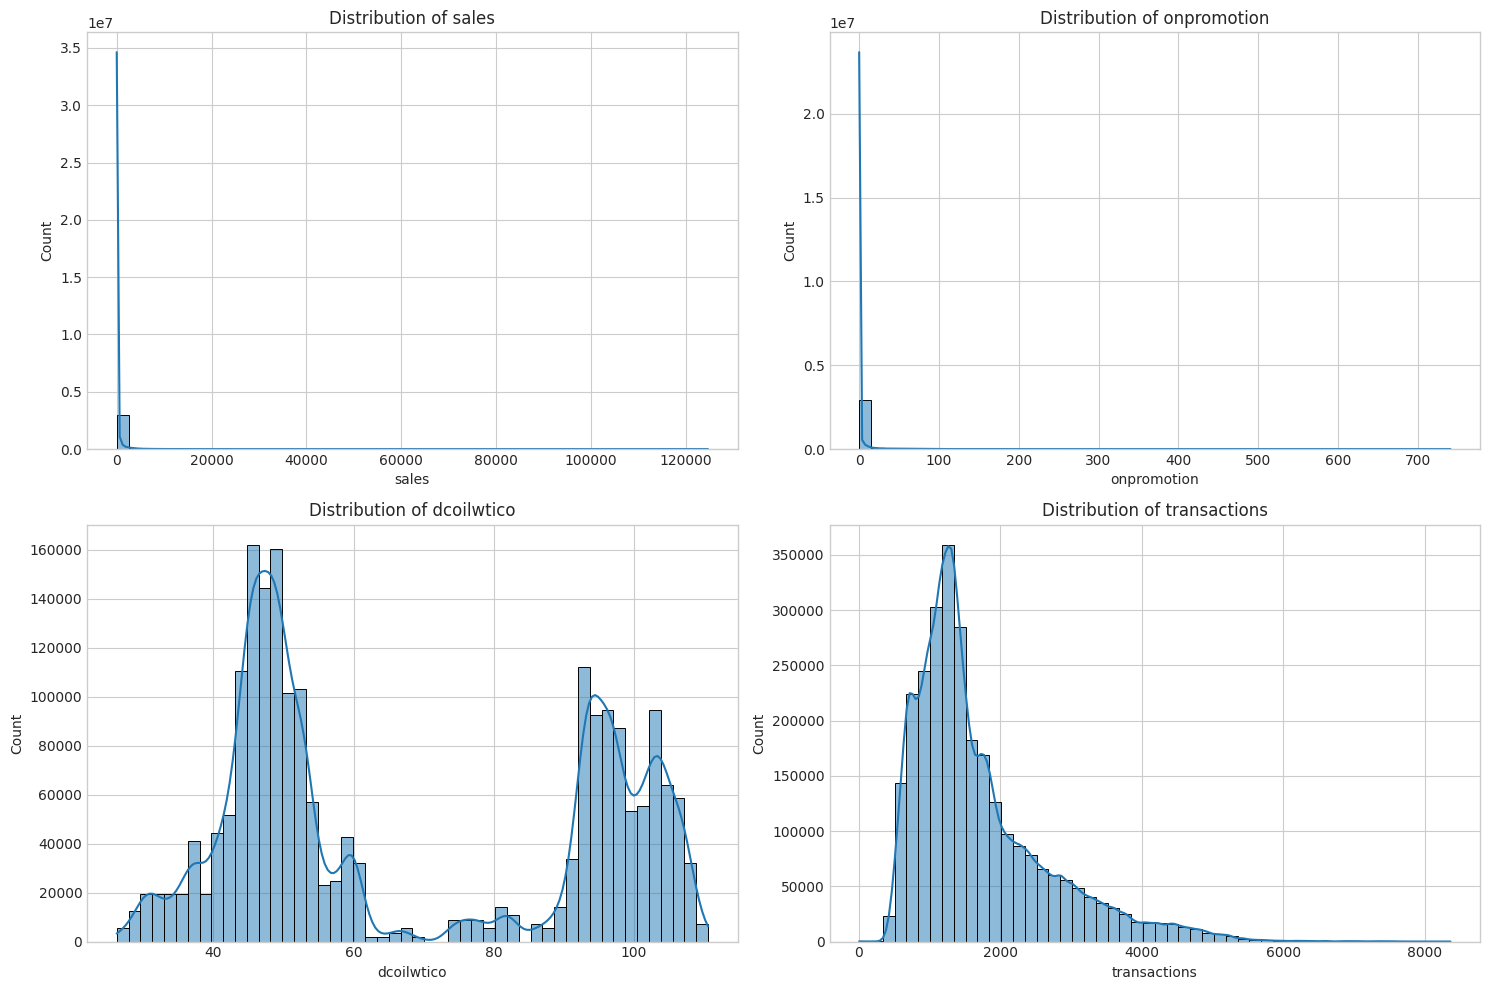

              sales   onpromotion    dcoilwtico  transactions
count  3.054348e+06  3.054348e+06  2.099196e+06  2.805231e+06
mean   3.590209e+02  2.617480e+00  6.801587e+01  1.697071e+03
std    1.107286e+03  1.225494e+01  2.569134e+01  9.668317e+02
min    0.000000e+00  0.000000e+00  2.619000e+01  5.000000e+00
25%    0.000000e+00  0.000000e+00  4.641000e+01  1.046000e+03
50%    1.100000e+01  0.000000e+00  5.343000e+01  1.395000e+03
75%    1.960110e+02  0.000000e+00  9.581000e+01  2.081000e+03
max    1.247170e+05  7.410000e+02  1.106200e+02  8.359000e+03


In [20]:
# Convert float16 to float32 to avoid NotImplementedError
train1['onpromotion'] = train1['onpromotion'].astype('float32')

# Define numerical variables
num_vars = ['sales', 'onpromotion', 'dcoilwtico', 'transactions']

# Plot distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_vars, 1):
    plt.subplot(2, 2, i)
    
    # Filter out NaN values for the current column
    plot_data = train1[col].dropna()
    
    # Use try-except to handle potential plotting issues
    try:
        sns.histplot(data=plot_data, kde=True, bins=50)
        plt.title(f'Distribution of {col}')
    except Exception as e:
        print(f"Could not plot {col}: {str(e)}")
        
plt.tight_layout()
plt.show()

# Summary statistics
print(train1[num_vars].describe())

### DateTime Variable

We will visualize datatime variable in this step. 

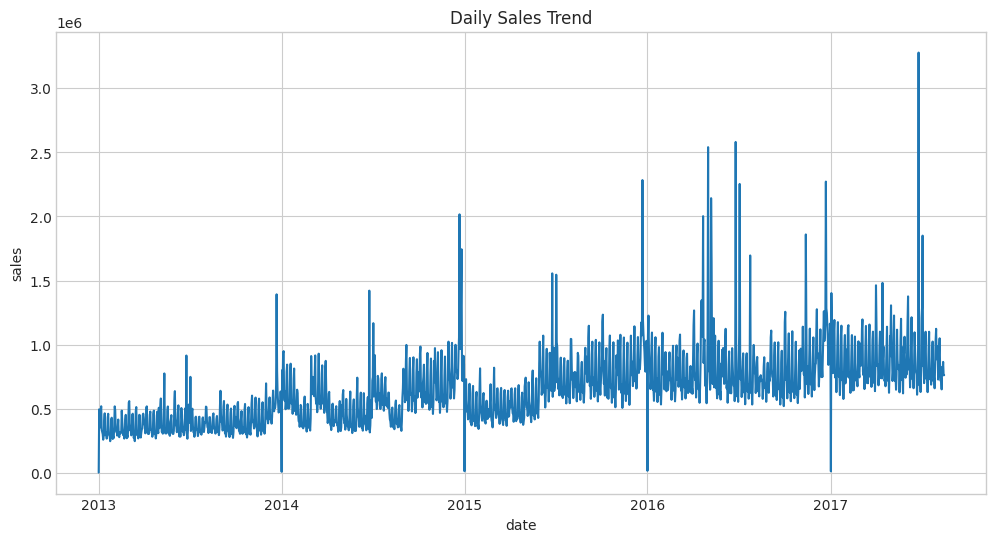

In [21]:
# Extract temporal features (if not already done)
train1['day'] = train1['date'].dt.day
train1['day_name'] = train1['date'].dt.day_name()

# Plot sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=train1.groupby('date')['sales'].sum().reset_index(), x='date', y='sales')
plt.title('Daily Sales Trend')
plt.show()

<a id = "8"></a><br>
# Basic Data Analysis

We will do basic data analysis. Basic data analysis serves as the foundation for understanding and extracting valuable insights from raw data. 

* Store Type - Sales
* Family (Product Category) - Sales
* Holiday Type - Sales
* Sales Distribution by Promotion Status
* Oil Price vs Sales Correlation
* Monthly Sales Trends
* Day of Week Analysis
* Store Cluster Performance
* City-Level Analysis

**Store Type - Sales**

In [22]:
train1[["store_type", "sales"]].groupby(["store_type"], as_index=False).mean().sort_values(by="sales", ascending=False)

,store_type,sales
0,A,708.378174
3,D,352.084503
1,B,328.275238
4,E,270.285492
2,C,197.790649


**Family (Product Category) - Sales**

In [23]:
train1[["family", "sales"]].groupby(["family"], as_index=False).mean().sort_values(by="sales", ascending=False).head(10)

,family,sales
12,GROCERY I,3790.432861
3,BEVERAGES,2394.912598
30,PRODUCE,1355.373657
7,CLEANING,1074.171509
8,DAIRY,711.175964
5,BREAD/BAKERY,464.150604
28,POULTRY,351.078796
24,MEATS,341.965912
25,PERSONAL CARE,271.192383
9,DELI,265.629730


**Holiday Type - Sales**

In [24]:
train1[["holiday_type", "sales"]].groupby(["holiday_type"], as_index=False).mean().sort_values(by="sales", ascending=False)

,holiday_type,sales
0,Additional,487.628906
4,Transfer,467.753113
1,Bridge,446.750854
2,Event,425.660065
5,Work Day,372.157532
3,Holiday,358.433807


**Sales Distribution by Promotion Status**

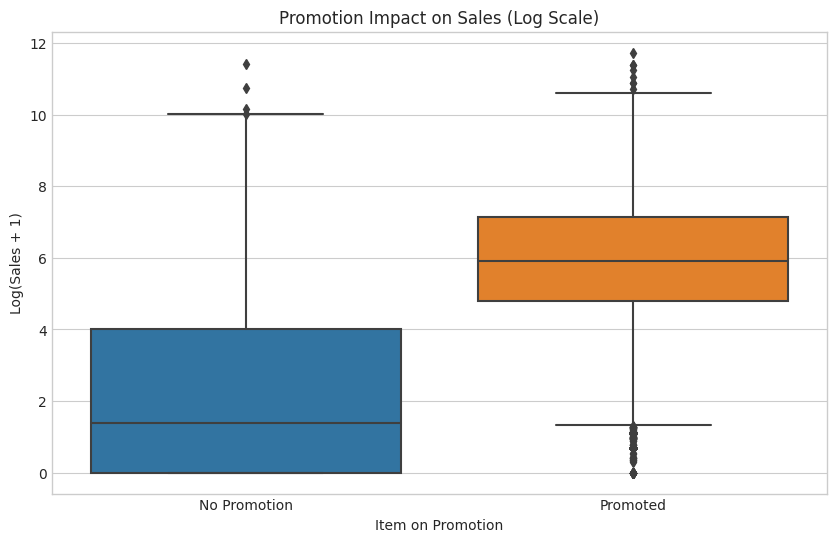

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train1["onpromotion"] > 0, 
            y=np.log1p(train1["sales"]))  # Log transform for better visibility
plt.title("Promotion Impact on Sales (Log Scale)")
plt.xlabel("Item on Promotion")
plt.ylabel("Log(Sales + 1)")
plt.xticks([0,1], ["No Promotion", "Promoted"])
plt.show()

**Oil Price vs Sales Correlation**

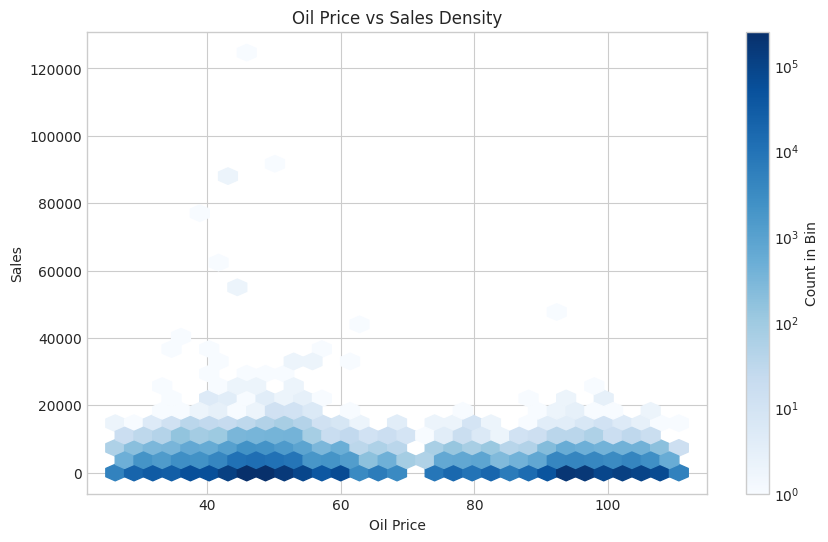

In [26]:
plt.figure(figsize=(10,6))
plt.hexbin(x=train1["dcoilwtico"], y=train1["sales"], gridsize=30, cmap="Blues", bins='log')
plt.colorbar(label="Count in Bin")
plt.title("Oil Price vs Sales Density")
plt.xlabel("Oil Price")
plt.ylabel("Sales")
plt.show()

**Monthly Sales Trends**

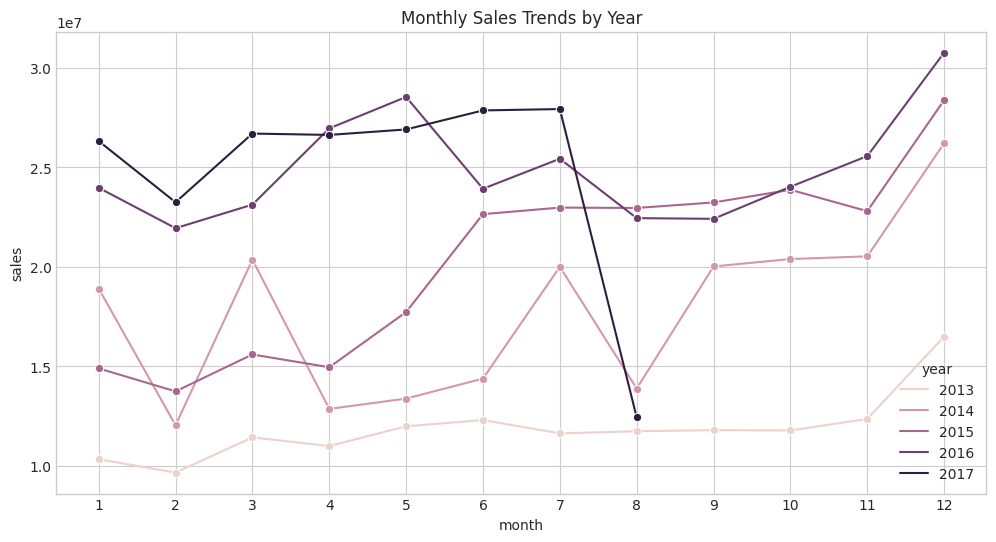

In [27]:
monthly_sales = train1.groupby(["year", "month"])["sales"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x="month", y="sales", hue="year", data=monthly_sales, marker="o")
plt.title("Monthly Sales Trends by Year")
plt.xticks(range(1,13))
plt.show()

**Day of Week Analysis**

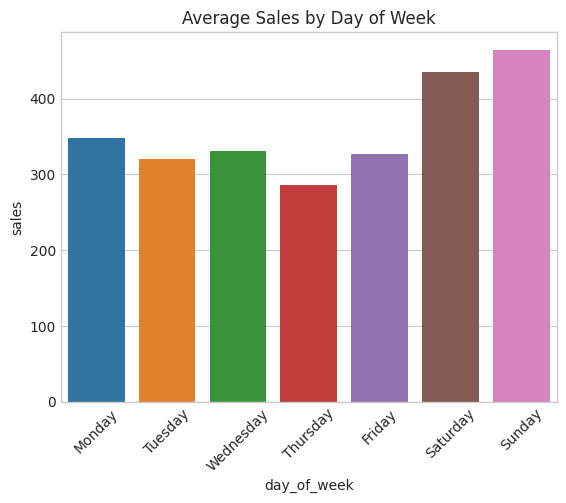

In [28]:
dow_sales = train1.groupby("day_of_week")["sales"].mean().reset_index()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.barplot(x="day_of_week", y="sales", data=dow_sales, order=order)
plt.title("Average Sales by Day of Week")
plt.xticks(rotation=45)
plt.show()

**Store Cluster Performance**

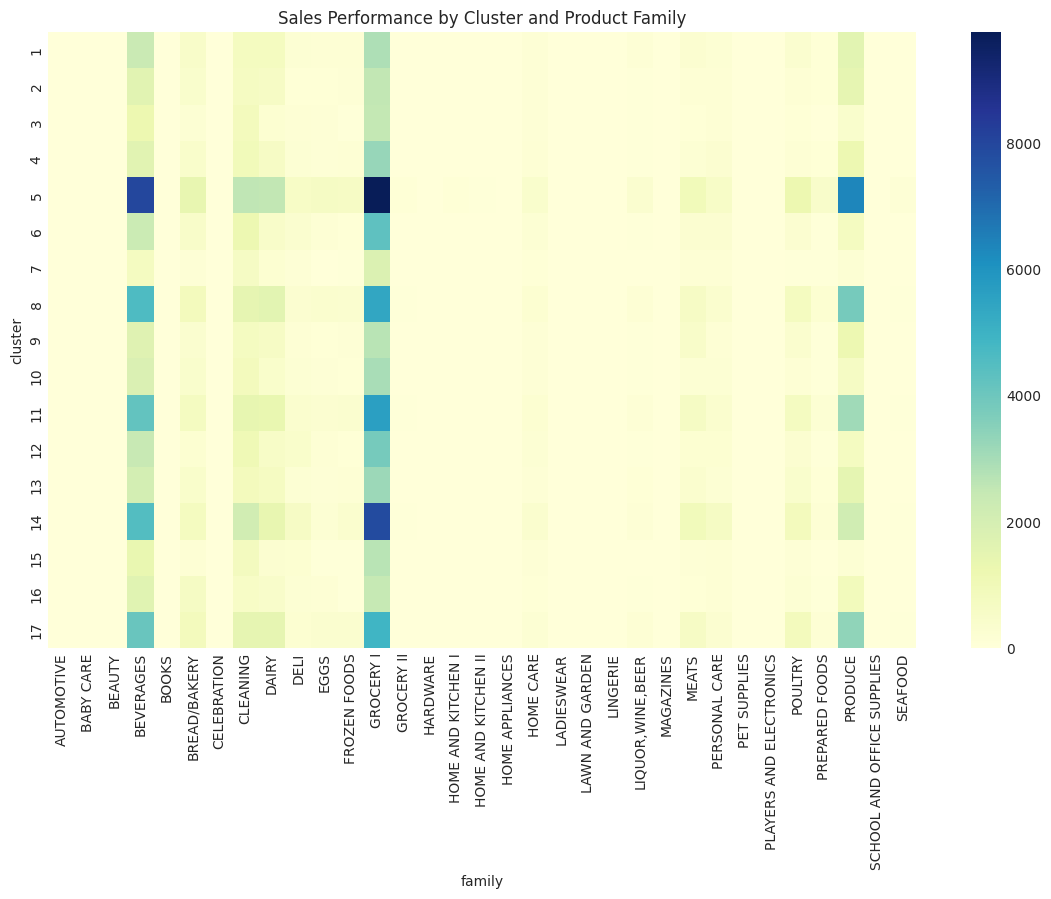

In [29]:
cluster_performance = train1.groupby(["cluster", "family"])["sales"].mean().unstack()
plt.figure(figsize=(14,8))
sns.heatmap(cluster_performance, cmap="YlGnBu")
plt.title("Sales Performance by Cluster and Product Family")
plt.show()

**City-Level Analysis**

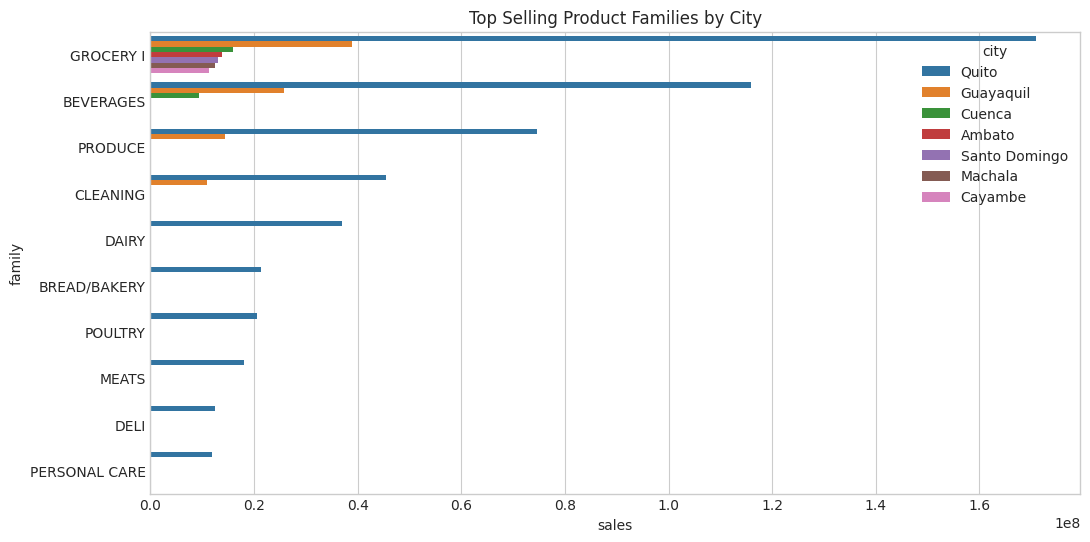

In [30]:
city_sales = train1.groupby(["city", "family"])["sales"].sum().nlargest(20).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x="sales", y="family", hue="city", data=city_sales)
plt.title("Top Selling Product Families by City")
plt.show()

<a id = "9"></a><br>
# Data Cleaning

In the data cleaning, we have the most important step for data science lifecycle. In a lot of project, this step is %80 of the work. We will give importance because of that data cleaning step. We will apply that steps: 

* **Outlier Detection**

    We will focus IQR test for outlier detection.
    
* **Missing Values**

    We will find and fill missing values.
    
In the end of this part we will visualize some values. We will see correlation matrix.

<a id = "10"></a><br>
## Outlier Detection

We will do outlier detection. We have some outlier values in the dataset. If you pass this step, you can't have good score in your model. You shouldn't pass! 

You can find a lot of method for outlier detection like IQR, z-score etc. . We will use IQR test in this dataset.

In [31]:
def business_aware_outliers(df, columns):
    """
    Detect outliers based on business rules for specified columns.
    
    Parameters:
        df (pd.DataFrame): Input dataframe
        columns (list): Columns to analyze (must include 'transactions' and 'dcoilwtico')
    
    Returns:
        pd.Index: Indices of outlier rows
    """
    outliers = pd.Series(False, index=df.index)
    
    # Column-specific rules
    for col in columns:
        if col == 'onpromotion':
            # Rule 1: Onpromotion (0-100 normal range)
            outliers |= df[col].gt(100)
            
        elif col == 'transactions':
            # Rule 2: Store-specific transaction limits (3σ)
            transaction_limits = df.groupby('store_nbr')[col].agg(['mean','std'])
            for store in transaction_limits.index:
                store_mask = (df['store_nbr'] == store)
                upper_limit = transaction_limits.loc[store, 'mean'] + 3*transaction_limits.loc[store, 'std']
                outliers |= store_mask & df[col].gt(upper_limit)
                
        elif col == 'dcoilwtico':
            # Rule 3: Oil price volatility (30-day rolling 3σ)
            oil_rolling = df[col].rolling(30).agg(['mean','std'])
            upper_oil = oil_rolling['mean'] + 3*oil_rolling['std']
            outliers |= df[col].gt(upper_oil.fillna(upper_oil.mean()))
    
    return outliers[outliers].index

# Usage
outlier_cols = ['onpromotion', 'dcoilwtico', 'transactions']
outliers = business_aware_outliers(train1, outlier_cols)
print(f"Business-validated outliers detected: {len(outliers)} ({len(outliers)/len(train1):.2%})")

Business-validated outliers detected: 46748 (1.53%)


We will visualize the outliers:

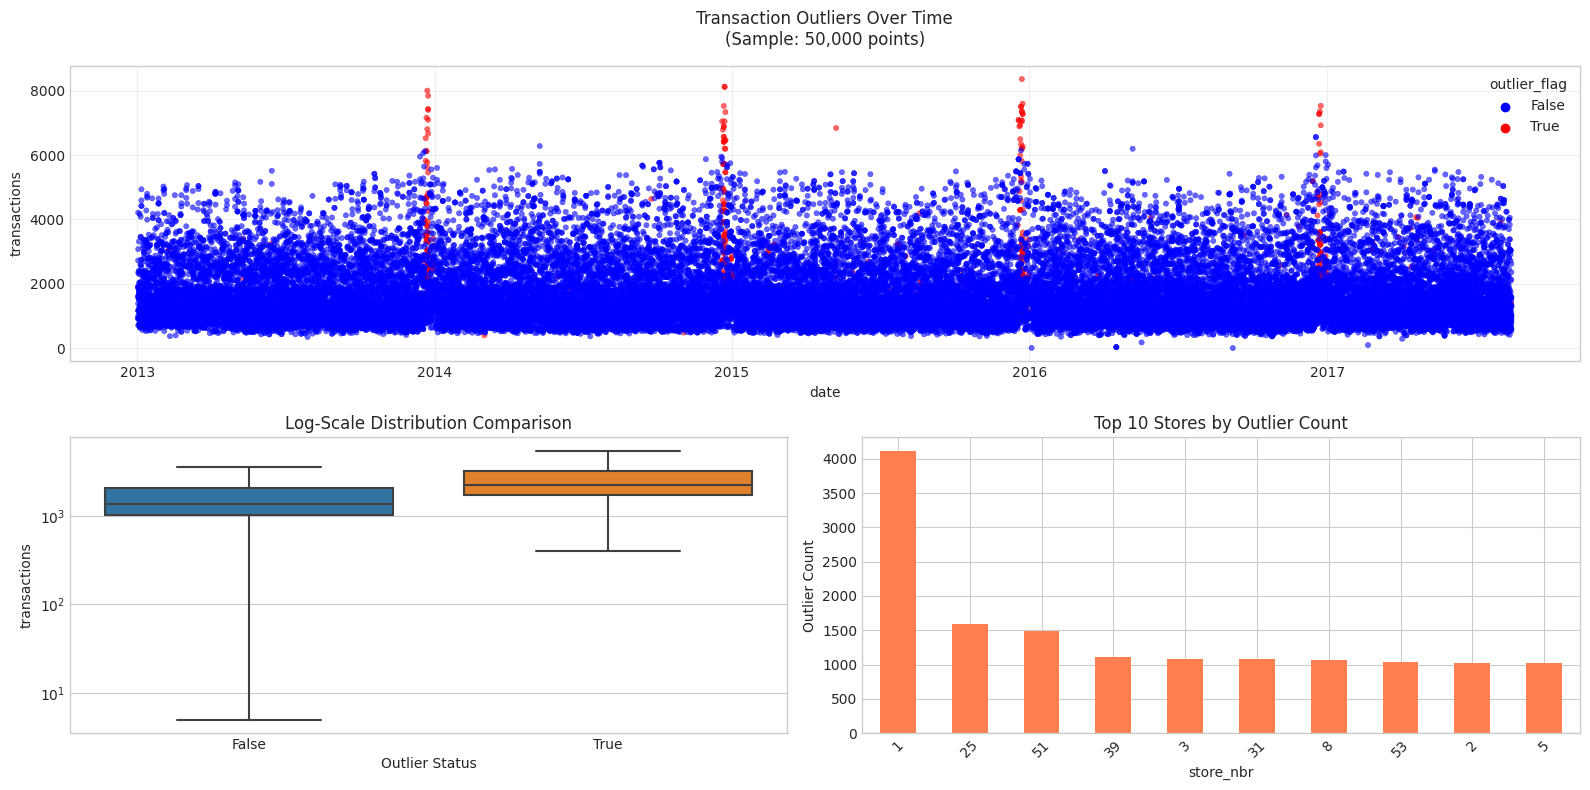

In [32]:
def plot_outliers_optimized(df, sample_size=50000):
    """
    Optimized visualization for large datasets with:
    - Smart sampling
    - Enhanced visual clarity
    - Faster rendering
    """
    
    # Make sure the DataFrame has the outlier_flag column
    if 'outlier_flag' not in df.columns:
        # Get the outlier indices from the business_aware_outliers function
        outlier_cols = ['onpromotion', 'dcoilwtico', 'transactions']
        outlier_indices = business_aware_outliers(df, outlier_cols)
        
        # Create the outlier_flag column
        df = df.copy()  # Create a copy to avoid modifying the original
        df['outlier_flag'] = False
        df.loc[outlier_indices, 'outlier_flag'] = True
    
    # 1. Smart Sampling - Stratified to preserve outlier ratio
    outlier_ratio = df['outlier_flag'].mean()
    sample_outliers = min(int(sample_size * outlier_ratio), 
                      df['outlier_flag'].sum())
    sample_normal = sample_size - sample_outliers
    
    outlier_sample = df[df['outlier_flag']].sample(sample_outliers, random_state=42)
    normal_sample = df[~df['outlier_flag']].sample(sample_normal, random_state=42)
    plot_sample = pd.concat([outlier_sample, normal_sample])
    
    # 2. Enhanced Visualization
    plt.figure(figsize=(16, 8))
    
    # Panel 1: Temporal View
    ax1 = plt.subplot(2, 2, (1, 2))
    sns.scatterplot(data=plot_sample, x='date', y='transactions',
                   hue='outlier_flag', palette={True: 'red', False: 'blue'},
                   alpha=0.6, s=15, edgecolor=None)
    plt.title(f"Transaction Outliers Over Time\n(Sample: {sample_size:,} points)", pad=15)
    plt.grid(True, alpha=0.3)
    
    # Panel 2: Distribution Comparison
    plt.subplot(2, 2, 3)
    sns.boxplot(x='outlier_flag', y='transactions', 
               data=plot_sample, showfliers=False)
    plt.yscale('log')
    plt.title("Log-Scale Distribution Comparison")
    plt.xlabel("Outlier Status")
    
    # Panel 3: Store-wise Outlier Count
    plt.subplot(2, 2, 4)
    store_outliers = df[df['outlier_flag']].groupby('store_nbr').size()
    store_outliers.nlargest(10).plot(kind='bar', color='coral')
    plt.title("Top 10 Stores by Outlier Count")
    plt.ylabel("Outlier Count")
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Usage
# Now you can call the function directly with train1
plot_outliers_optimized(train1)

Business-validated outliers detected: 46,748 (1.53% of total data)

**Decision: Retain Outliers**
After careful analysis, we will preserve these identified outliers because they represent legitimate business scenarios, have statistical significance, provide value for robust modeling, and serve as natural indicators for exceptional events.

<a id = "11"></a><br>
## Missing Values

We need to check dataset that we have missing values or not! We will check. If we have, we will find them. After that we will find missing values. Some machine learning models can't fit your dataset so you need to handle with missing values! Let's find and fill them!

### Identify Missing Values

In [33]:
# Missing value summary
missing = train1.isnull().sum().sort_values(ascending=False)
missing_pct = (train1.isnull().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_pct], axis=1, keys=['Total', 'Percentage'])

,Total,Percentage
holiday_type,2551824,83.547258
locale,2551824,83.547258
locale_name,2551824,83.547258
description,2551824,83.547258
transferred,2551824,83.547258
dcoilwtico,955152,31.271879
transactions,249117,8.156143
id,0,0.000000
cluster,0,0.000000
day,0,0.000000


**Why We Don't Need to Fill Missing Values in Our Time Series Dataset**

**Missing Values Summary**
With approximately 3 million records in our dataset, we observe the following patterns:

| Feature | Missing Count | Missing % |
|---------|--------------|-----------|
| holiday_type | 2,551,824 | 83.55% |
| locale | 2,551,824 | 83.55% |
| locale_name | 2,551,824 | 83.55% |
| description | 2,551,824 | 83.55% |
| transferred | 2,551,824 | 83.55% |
| dcoilwtico | 955,152 | 31.27% |
| transactions | 249,117 | 8.16% |
| Core business features | 0 | 0% |

**Why Imputation Is Unnecessary for This Dataset**

**Holiday Variables (83.5% missing)**
- These missing values **represent valid business reality** - most days aren't holidays.
- Filling these values would create false information in our dataset.
- Better approach: Create a binary flag `is_holiday` to capture this information when needed.
- These variables can remain missing without affecting our time series analysis.

**Oil Prices (31.3% missing)**
- Oil prices naturally have gaps due to market closures and reporting delays.
- In time series modeling, we can build models that account for these known gaps.
- Most time series algorithms can handle missing values in predictor variables.
- Forcing values could introduce artificial patterns that don't exist in reality.

**Transactions (8.2% missing)**
- Missing transactions likely indicate days when stores were closed.
- Filling these values would introduce fictional business activity.
- Time series models can accommodate these business-driven patterns.
- Our target variable (sales) has no missing values, which is most critical.

**Core Business Variables (0% missing)**
- All essential business metrics have complete data.
- We have complete records for our primary dimensions (time, store, product).
- The target variable for forecasting (sales) has no missing values.

**Time Series Modeling Advantages**

By not imputing missing values:
- We maintain data authenticity and integrity
- We avoid introducing artificial patterns
- We respect the genuine temporal dynamics of the business
- We reduce processing time and complexity for 3 million records
- We prevent potential distortion of seasonal patterns

For this large-scale time series dataset, preserving the natural patterns of missingness often leads to more accurate and interpretable models than arbitrary imputation would provide.

<a id = "12"></a><br>
# Feature Engineering

Feature engineering is a crucial step in building an effective predictive model. It involves creating new features or transforming existing ones to improve the model's performance. In this section, we'll enhance our dataset by extracting meaningful information and creating new variables that can help predict sales more accurately.

## Date-Based Features
We'll start by extracting more detailed date-based features, as time-series data often benefits from temporal patterns.

In [34]:
# Extract day of the month, day of the year, and whether it's a weekend
train1['day'] = train1['date'].dt.day
train1['day_of_year'] = train1['date'].dt.dayofyear
train1['is_weekend'] = (train1['day_of_week'].isin(['Saturday', 'Sunday'])).astype(int)

# Create a feature for the month-year combination
train1['month_year'] = train1['date'].dt.to_period('M')

# Extract seasonality features (Ecuador is in southern hemisphere)
train1['season'] = train1['month'] % 12 // 3 + 1

## Lag Features

For time-series data, lag features (values from previous time periods) can be particularly useful.

In [35]:
# Sort by store, family and date
train1 = train1.sort_values(['store_nbr', 'family', 'date'])

# Create lag features for sales (previous day, same day last week, same day last month)
train1['sales_lag1'] = train1.groupby(['store_nbr', 'family'])['sales'].shift(1)
train1['sales_lag7'] = train1.groupby(['store_nbr', 'family'])['sales'].shift(7)
train1['sales_lag30'] = train1.groupby(['store_nbr', 'family'])['sales'].shift(30)

# Create rolling average features
train1['sales_rolling_mean7'] = train1.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(7, 1).mean())
train1['sales_rolling_mean30'] = train1.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(30, 1).mean())

## Holiday Features

We'll enhance our holiday-related features to better capture their impact.

In [36]:
# Create binary feature for holidays
train1['is_holiday'] = (~train1['holiday_type'].isna()).astype(int)

# Create features for days before/after holidays
train1['days_until_holiday'] = train1.groupby('holiday_type')['date'].transform(lambda x: (x - x.min()).dt.days)
train1['days_since_holiday'] = train1.groupby('holiday_type')['date'].transform(lambda x: (x.max() - x).dt.days)

# Create holiday type categories
train1['holiday_type'] = train1['holiday_type'].fillna('None')
train1['is_national_holiday'] = (train1['locale'] == 'National').astype(int)
train1['is_regional_holiday'] = (train1['locale'] == 'Regional').astype(int)
train1['is_local_holiday'] = (train1['locale'] == 'Local').astype(int)

## Oil Price Features

Since Ecuador's economy is heavily dependent on oil prices, we'll create features to capture this relationship.

In [37]:
# Fill missing oil prices with forward fill
train1['dcoilwtico'] = train1.groupby('year')['dcoilwtico'].ffill()

# Create rolling statistics for oil prices
train1['oil_rolling_mean7'] = train1.groupby('year')['dcoilwtico'].transform(lambda x: x.rolling(7, 1).mean())
train1['oil_rolling_std7'] = train1.groupby('year')['dcoilwtico'].transform(lambda x: x.rolling(7, 1).std())

# Create percentage change features
train1['oil_pct_change'] = train1.groupby('year')['dcoilwtico'].pct_change()

## Store and Product Family Features

We'll create features that capture store and product family characteristics.

In [38]:
# Calculate mean sales by store and family
store_family_means = train1.groupby(['store_nbr', 'family'])['sales'].mean().reset_index()
store_family_means.columns = ['store_nbr', 'family', 'store_family_mean_sales']
train1 = train1.merge(store_family_means, on=['store_nbr', 'family'], how='left')

# Calculate mean sales by family across all stores
family_means = train1.groupby('family')['sales'].mean().reset_index()
family_means.columns = ['family', 'family_mean_sales']
train1 = train1.merge(family_means, on='family', how='left')

# Create a feature for store sales proportion of total sales
train1['sales_proportion'] = train1['sales'] / train1.groupby(['date', 'family'])['sales'].transform('sum')

## Promotion Features

We'll enhance the promotion-related features to better understand their impact.

In [39]:
# Create binary feature for promotions
train1['has_promotion'] = (train1['onpromotion'] > 0).astype(int)

# Calculate promotion ratio by family
train1['promotion_ratio'] = train1['onpromotion'] / train1.groupby(['date', 'family'])['onpromotion'].transform('sum')

# Create features for days since last promotion
train1['days_since_promotion'] = train1.groupby(['store_nbr', 'family'])['has_promotion'].transform(lambda x: (x == 0).cumsum())

## Transaction Features

We'll create features based on transaction data.

In [40]:
# Fill missing transactions with store's average
store_trans_avg = train1.groupby('store_nbr')['transactions'].mean().reset_index()
store_trans_avg.columns = ['store_nbr', 'store_mean_transactions']
train1 = train1.merge(store_trans_avg, on='store_nbr', how='left')
train1['transactions'] = train1['transactions'].fillna(train1['store_mean_transactions'])

# Create sales per transaction feature
train1['sales_per_transaction'] = train1['sales'] / train1['transactions']

## Final Data Preparation

Before modeling, we'll perform some final data preparation steps.


In [41]:
# Drop temporary columns
train1.drop(['store_mean_transactions', 'month_year'], axis=1, inplace=True)

# Fill remaining missing values
train1.fillna(0, inplace=True)

# Convert categorical variables to numerical representations
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train1['family_encoded'] = le.fit_transform(train1['family'])
train1['city_encoded'] = le.fit_transform(train1['city'])
train1['state_encoded'] = le.fit_transform(train1['state'])
train1['store_type_encoded'] = le.fit_transform(train1['store_type'])
train1['day_of_week_encoded'] = le.fit_transform(train1['day_of_week'])

# Display the enhanced dataset
train1.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,day,day_name,day_of_year,is_weekend,season,sales_lag1,sales_lag7,sales_lag30,sales_rolling_mean7,sales_rolling_mean30,is_holiday,days_until_holiday,days_since_holiday,is_national_holiday,is_regional_holiday,is_local_holiday,oil_rolling_mean7,oil_rolling_std7,oil_pct_change,store_family_mean_sales,family_mean_sales,sales_proportion,has_promotion,promotion_ratio,days_since_promotion,sales_per_transaction,family_encoded,city_encoded,state_encoded,store_type_encoded,day_of_week_encoded
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Holiday,National,Ecuador,Primer dia del ano,False,0.00,Quito,Pichincha,D,13,1522.362251,2013,1,1,1,Tuesday,1,Tuesday,1,0,1,0.0,0.0,0.0,0.000000,0.000000,1,0.0,1687.0,1,0,0,0.000000,0.000000,0.000000,3.251459,6.119517,0.000000,0,0.0,1,0.000000,0,18,12,3,5
1,1782,2013-01-02,1,AUTOMOTIVE,2.0,0.0,None,0,0,0,0,93.14,Quito,Pichincha,D,13,2111.000000,2013,1,1,1,Wednesday,2,Wednesday,2,0,1,0.0,0.0,0.0,1.000000,1.000000,0,0.0,0.0,0,0,0,93.140000,0.000000,0.000000,3.251459,6.119517,0.007843,0,0.0,2,0.000947,0,18,12,3,6
2,3564,2013-01-03,1,AUTOMOTIVE,3.0,0.0,None,0,0,0,0,92.97,Quito,Pichincha,D,13,1833.000000,2013,1,1,1,Thursday,3,Thursday,3,0,1,2.0,0.0,0.0,1.666667,1.666667,0,0.0,0.0,0,0,0,93.055000,0.120208,-0.001825,3.251459,6.119517,0.018634,0,0.0,3,0.001637,0,18,12,3,4
3,5346,2013-01-04,1,AUTOMOTIVE,3.0,0.0,None,0,0,0,0,93.12,Quito,Pichincha,D,13,1863.000000,2013,1,1,1,Friday,4,Friday,4,0,1,3.0,0.0,0.0,2.000000,2.000000,0,0.0,0.0,0,0,0,93.076667,0.092916,0.001613,3.251459,6.119517,0.017751,0,0.0,4,0.001610,0,18,12,3,0
4,7128,2013-01-05,1,AUTOMOTIVE,5.0,0.0,Work Day,National,Ecuador,Recupero puente Navidad,False,93.12,Quito,Pichincha,D,13,1509.000000,2013,1,1,1,Saturday,5,Saturday,5,1,1,3.0,0.0,0.0,2.600000,2.600000,1,0.0,1407.0,1,0,0,93.087500,0.078899,0.000000,3.251459,6.119517,0.014620,0,0.0,5,0.003313,0,18,12,3,2


## Feature Importance Analysis

Before moving to modeling, let's analyze the importance of our features.

In [42]:
# Calculate correlation with sales
#correlations = train1.corr()['sales'].sort_values(ascending=False)
#print("Features most correlated with sales:")
#print(correlations.head(10))
#print("\nFeatures least correlated with sales:")
#print(correlations.tail(10))

# Visualize feature correlations
#plt.figure(figsize=(12, 8))
#sns.heatmap(train1.corr(), cmap='coolwarm', center=0)
#plt.title('Feature Correlation Matrix')
#plt.show()